# Introduction

Chipotle Mexican Grill, Inc., often known simply as Chipotle, is an American chain of fast casual restaurants in the United States, United Kingdom, Canada, Germany, and France, specializing in bowls, tacos and Mission burritos that are made to order in front of the customer.

In [1]:
# Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings




# Data Preparation

## Loading Data

In [2]:
df = pd.read_csv('../Chipotle/data/chipotle.tsv',sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


## Cleaning Data

In [5]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [6]:
# Cleaning Data

df.replace('-', ' ', regex=True, inplace=True)
df.replace('Canned Soda', 'Canned Soft Drink', regex=True, inplace=True)
df.replace('Veggie Salad', 'Veggie Salad Bowl',regex= True, inplace=True)
df.replace('Veggie Salad Bowl Bowl', 'Veggie Salad Bowl',regex= True, inplace=True)
df.replace('Veggie Bowl', 'Veggie Salad Bowl',regex= True, inplace=True)
df.replace('Carnitas Bowl', 'Carnitas Salad Bowl', inplace=True)
df.replace('Carnitas Salad', 'Carnitas Salad Bowl', inplace=True)
df.replace('Barbacoa Bowl', 'Barbacoa Salad Bowl', inplace=True)
df.replace('Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo Chili Salsa', inplace=True)
df.replace('Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Chili Salsa', inplace=True)

In [15]:
dollar = lambda x: float(x[1:-1])
df.item_price = df.item_price.apply(dollar)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


## Organizing Data

In [16]:
# Which was the most ordered item? 
df1 = df.groupby('item_name').sum().sort_values(['quantity'], ascending=False)

# Reset the index of df1
df1.reset_index(inplace=True)

# Create a new DataFrame with selected columns from df1
most_ordered_df = df1[["item_name", "order_id", "quantity","item_price"]]

# Display the resulting DataFrame
most_ordered_df.head()

,item_name,order_id,quantity,item_price
0,Chicken Bowl,713926,761,7342.73
1,Chicken Burrito,497303,591,5575.82
2,Chips and Guacamole,449959,506,2201.04
3,Canned Soft Drink,381149,477,576.09
4,Steak Burrito,328437,386,3851.43


In [17]:
# Calculate the total item price and total quantity for each item
most_ordered_df['avg_price'] = (most_ordered_df['item_price'] /most_ordered_df['quantity']).round(2)

most_ordered_df

,item_name,order_id,quantity,item_price,avg_price
0,Chicken Bowl,713926,761,7342.73,9.65
1,Chicken Burrito,497303,591,5575.82,9.43
2,Chips and Guacamole,449959,506,2201.04,4.35
3,Canned Soft Drink,381149,477,576.09,1.21
4,Steak Burrito,328437,386,3851.43,9.98
5,Chips,208004,230,494.34,2.15
6,Steak Bowl,193752,221,2260.19,10.23
7,Bottled Water,175944,211,302.56,1.43
8,Chips and Tomatillo Chili Salsa,126896,153,418.87,2.74
9,Chips and Fresh Tomato Salsa,100419,130,361.36,2.78


## Data Visualization

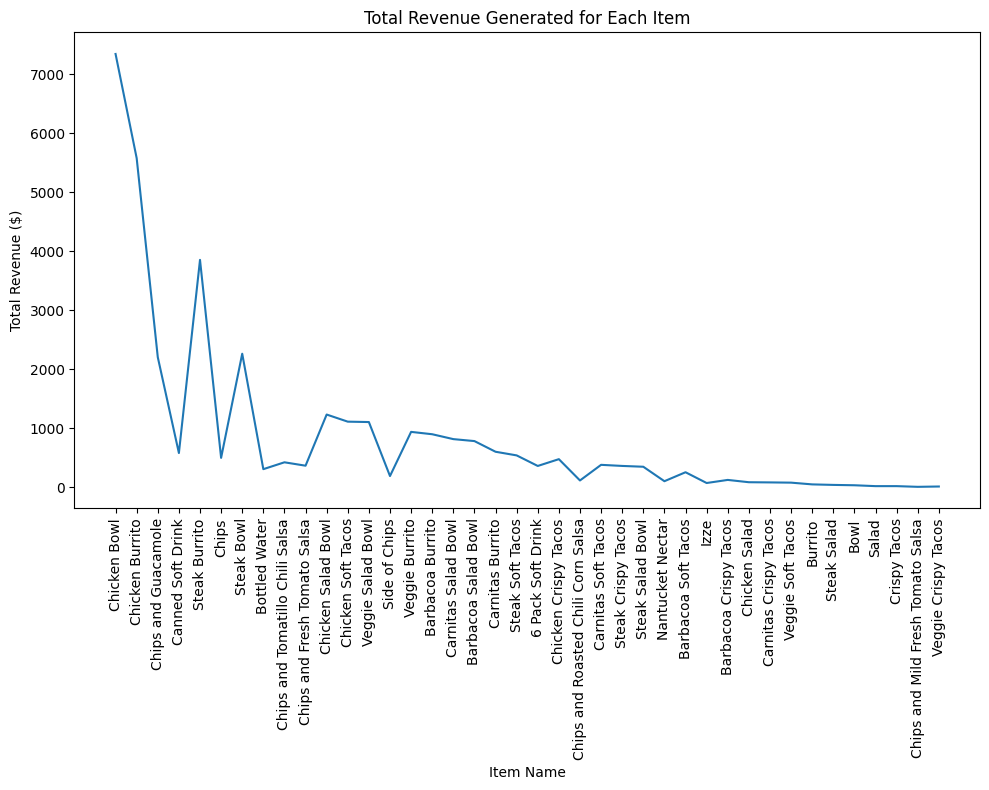

In [18]:
#Total Revenue Generated for Each Item
plt.figure(figsize = (10,8))
plt.plot(most_ordered_df["item_name"], most_ordered_df["item_price"])
# Customize the plot
plt.title('Total Revenue Generated for Each Item')
plt.xlabel('Item Name')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.grid(False)
# Show the plot
plt.tight_layout()
plt.show()

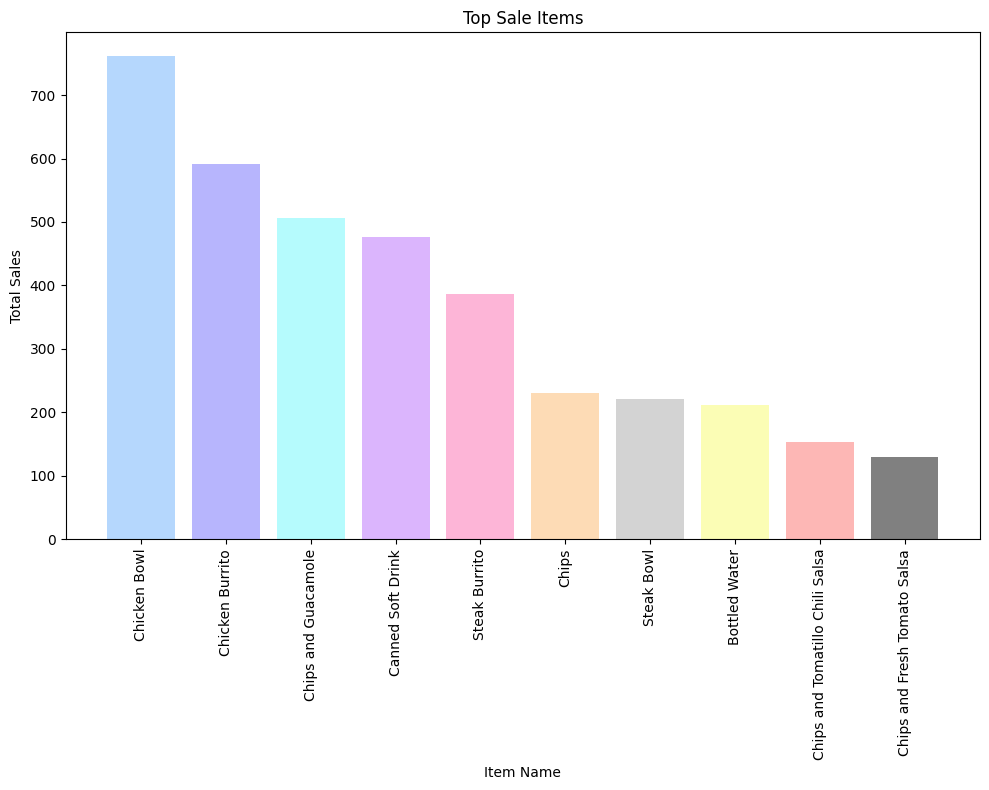

In [19]:
top_10_df= most_ordered_df.head(10)
plt.figure(figsize = (10,8))
colors = ['#b5d7fd', '#b7b5fd', '#b5fbfd', '#dbb5fd', '#fdb5d7', '#fddbb5', 'lightgray', '#fbfdb5', '#fdb7b5', 'gray']
plt.bar(top_10_df["item_name"], top_10_df["quantity"], color= colors)
# Customize the plot
plt.title('Top Sale Items')
plt.xlabel('Item Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(False)
# Show the plot
plt.tight_layout()
plt.show()

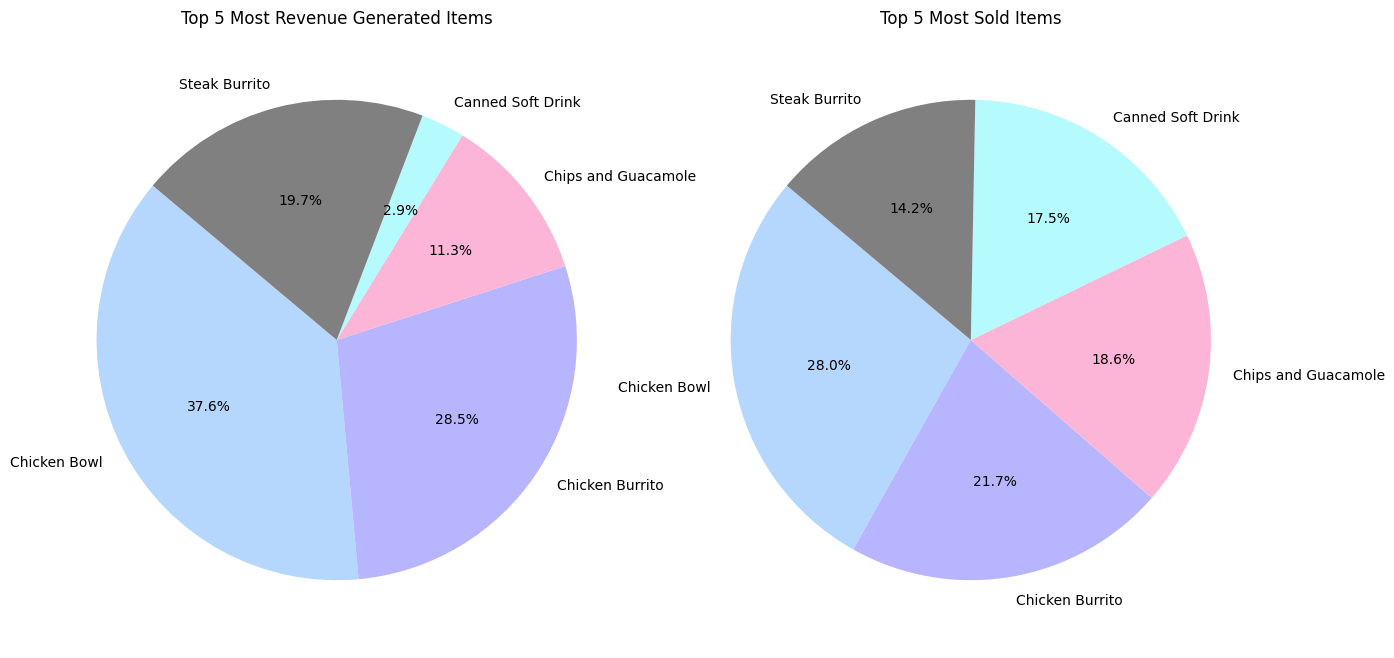

In [39]:
# Create a pie chart for the top 5 most revenue generated items
top_5_df = most_ordered_df.head(5)
plt.figure(figsize=(15, 8))

# Create the first subplot for the top 5 most revenue generated items
plt.subplot(1,2,1)
colors = ['#b5d7fd', '#b7b5fd', '#fdb5d7', '#b5fbfd', 'gray']
plt.pie(top_5_df["item_price"], labels=top_5_df["item_name"], colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 5 Most Revenue Generated Items')

# Create the second subplot for the top 5 most sold items
plt.subplot(1,2,2)
colors = ['#b5d7fd', '#b7b5fd', '#fdb5d7', '#b5fbfd', 'gray']
plt.pie(top_5_df["quantity"], labels=top_5_df["item_name"], colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Top 5 Most Sold Items')

plt.show()